In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [4]:
df = pd.DataFrame()

In [6]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

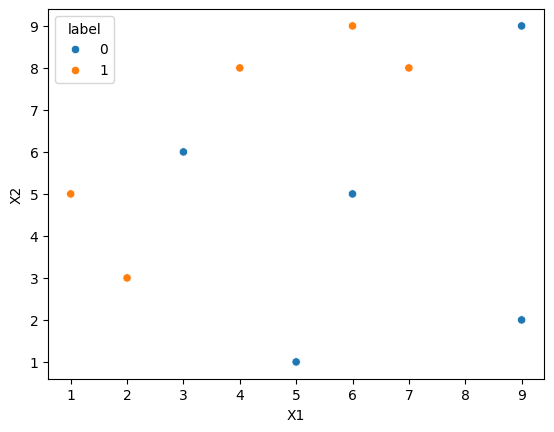

In [7]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [9]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [17]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,2].values

In [20]:
dt1.fit(X,Y) #Creating a stump

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

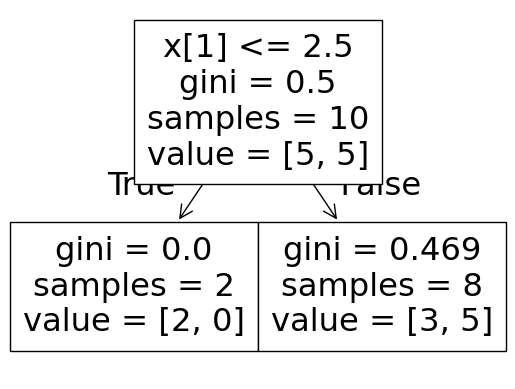

In [21]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

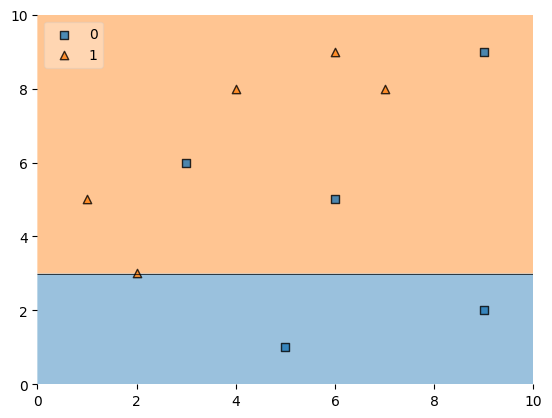

In [23]:
plot_decision_regions(X, Y, clf=dt1, legend=2)

In [25]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [28]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [29]:
#model weight for 1st model
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [31]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [39]:
#Normalize updated weights
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df['normalized_weights'].sum()

1.0

In [40]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [41]:
# df.drop(columns='nomalized_weights', inplace=True)
# df

In [43]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [44]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [45]:
index_values = create_new_dataset(df)
index_values

[5, 7, 8, 8, 7, 2, 7, 2, 6, 5]

In [46]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
5,6,9,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1


In [47]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [48]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [49]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.625, 0.5, '  False')]

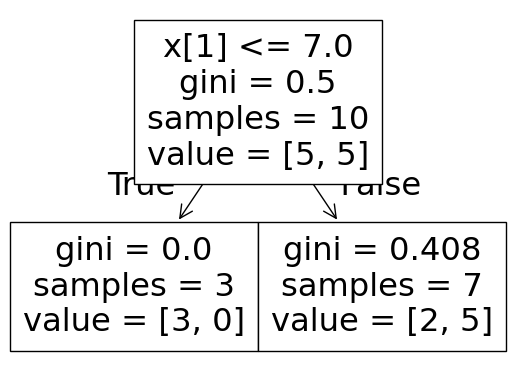

In [50]:
plot_tree(dt2)

<Axes: >

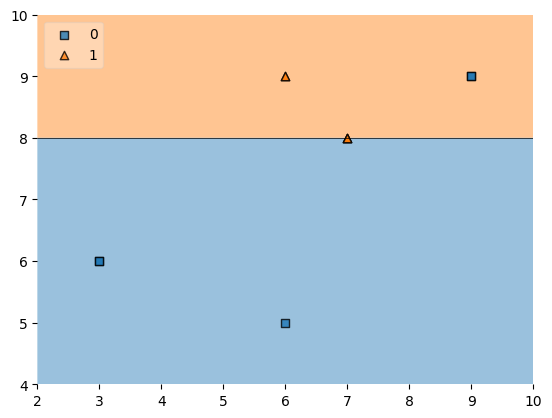

In [51]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [53]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,1


In [67]:
alpha2 = calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [54]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1,alpha=calculate_model_weight(0.1))
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033333
7,7,8,1,0.1,1,0.033333
8,9,9,0,0.1,1,0.300000
8,9,9,0,0.1,1,0.300000
7,7,8,1,0.1,1,0.033333
2,3,6,0,0.1,0,0.033333
7,7,8,1,0.1,1,0.033333
2,3,6,0,0.1,0,0.033333
6,6,5,0,0.1,0,0.033333
5,6,9,1,0.1,1,0.033333


In [56]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033333,0.038462
7,7,8,1,0.1,1,0.033333,0.038462
8,9,9,0,0.1,1,0.300000,0.346154
8,9,9,0,0.1,1,0.300000,0.346154
7,7,8,1,0.1,1,0.033333,0.038462
2,3,6,0,0.1,0,0.033333,0.038462
7,7,8,1,0.1,1,0.033333,0.038462
2,3,6,0,0.1,0,0.033333,0.038462
6,6,5,0,0.1,0,0.033333,0.038462
5,6,9,1,0.1,1,0.033333,0.038462


In [58]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])


second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.038462,0.000000,0.038462
7,7,8,1,0.1,1,0.038462,0.038462,0.076923
8,9,9,0,0.1,1,0.346154,0.076923,0.423077
8,9,9,0,0.1,1,0.346154,0.423077,0.769231
7,7,8,1,0.1,1,0.038462,0.769231,0.807692
2,3,6,0,0.1,0,0.038462,0.807692,0.846154
7,7,8,1,0.1,1,0.038462,0.846154,0.884615
2,3,6,0,0.1,0,0.038462,0.884615,0.923077
6,6,5,0,0.1,0,0.038462,0.923077,0.961538
5,6,9,1,0.1,1,0.038462,0.961538,1.000000


In [61]:
index_values = create_new_dataset(second_df)

third_df = second_df.iloc[index_values,[0,1,2,3]]

third_df

,X1,X2,label,weights
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1


In [62]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

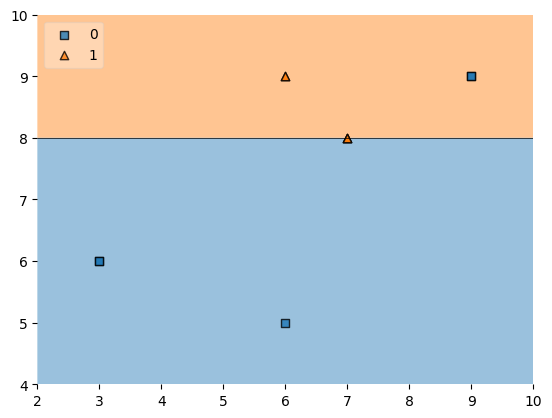

In [63]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [64]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,1
2,3,6,0,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1


In [65]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [69]:
query = np.array([3,1]).reshape(1,2)

final_pred = np.sign(alpha1*dt1.predict(query)+ alpha2*dt2.predict(query)+ alpha3*dt3.predict(query))
final_pred

array([0.])